# [**Regroupement hiérarchique : ward structuré vs non structuré**](https://nbviewer.org/github/Franck-PepperLabs/pepper_data-science_practising/blob/main/Sklearn/examples/2_3_cluster/plot_ward_structured_vs_unstructured.ipynb)<br/>([*Hierarchical clustering: structured vs unstructured ward*](https://scikit-learn.org/stable/auto_examples/cluster/plot_ward_structured_vs_unstructured.html))

Cet exemple crée un ensemble de données en forme de rouleau suisse et exécute un regroupement hiérarchique sur leur position.

Pour plus d'informations, consulter [**Regroupement hiérarchique** (2.3.6)](https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering).

Dans un premier temps,  le regroupement hiérarchique est effectué sans contraintes de connectivité sur la structure et repose uniquement sur la distance, tandis que dans une deuxième étape, le regroupement est restreint au graphe des k-voisins les plus proches : il s'agit d'un regroupement hiérarchique avec une structure préalable.

Certains des groupes appris sans contraintes de connectivité ne respectent pas la structure du rouleau suisse et s'étendent sur différentes parties des plis de la surface. En revanche, lorsque des contraintes de connectivité sont appliquées, les groupes forment une belle découpe du rouleau suisse.

In [1]:
# Authors : Vincent Michel, 2010
#           Alexandre Gramfort, 2010
#           Gael Varoquaux, 2010
# License: BSD 3 clause

import time as time

# The following import is required
# for 3D projection to work with matplotlib < 3.2

import mpl_toolkits.mplot3d  # noqa: F401

import numpy as np

# Génération du jeu de données

Nous commençons par générer le jeu de données en forme de rouleau suisse.

In [2]:
from sklearn.datasets import make_swiss_roll

n_samples = 1500
noise = 0.05
X, _ = make_swiss_roll(n_samples, noise=noise)
# Make it thinner
X[:, 1] *= 0.5

# Calcul du regroupement

Nous effectuons un [**`AgglomerativeClustering`**](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) qui relève du regroupement hiérarchique sans aucune contrainte de connectivité.

In [3]:
from sklearn.cluster import AgglomerativeClustering

print("Compute unstructured hierarchical clustering...")
st = time.time()
ward = AgglomerativeClustering(n_clusters=6, linkage="ward").fit(X)
elapsed_time = time.time() - st
label = ward.labels_
print(f"Elapsed time: {elapsed_time:.2f}s")
print(f"Number of points: {label.size}")

Compute unstructured hierarchical clustering...
Elapsed time: 0.15s
Number of points: 1500


# Affichage du résultat

Affichage des grappes hiérarchiques non structurées.

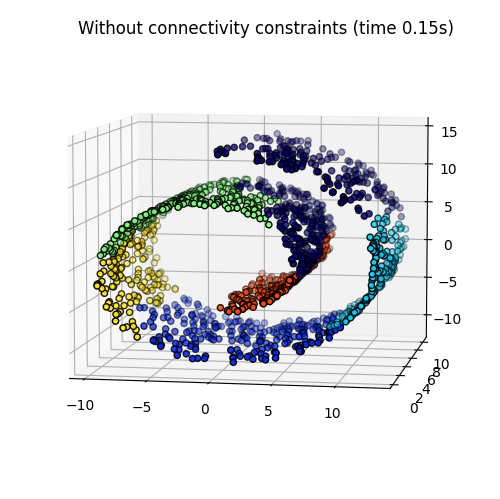

In [4]:
import matplotlib.pyplot as plt

fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection="3d", elev=7, azim=-80)
ax1.set_position([0, 0, 0.95, 1])
for l in np.unique(label):
    ax1.scatter(
        X[label == l, 0],
        X[label == l, 1],
        X[label == l, 2],
        color=plt.cm.jet(float(l) / np.max(label + 1)),
        s=20,
        edgecolor="k",
    )
_ = fig1.suptitle(f"Without connectivity constraints (time {elapsed_time:.2f}s)")

# Nous définissons les k-voisins les plus proches avec 10 voisins

In [5]:
from sklearn.neighbors import kneighbors_graph

connectivity = kneighbors_graph(X, n_neighbors=10, include_self=False)

# Calcul du regroupement

Nous effectuons à nouveau un [**`AgglomerativeClustering`**](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) avec des contraintes de connectivité.

In [6]:
print("Compute structured hierarchical clustering...")
st = time.time()
ward = AgglomerativeClustering(
    n_clusters=6, connectivity=connectivity, linkage="ward"
).fit(X)
elapsed_time = time.time() - st
label = ward.labels_
print(f"Elapsed time: {elapsed_time:.2f}s")
print(f"Number of points: {label.size}")

Compute structured hierarchical clustering...
Elapsed time: 0.10s
Number of points: 1500


# Affichage du résultat

Affichage des groupes hiérarchiques structurés.

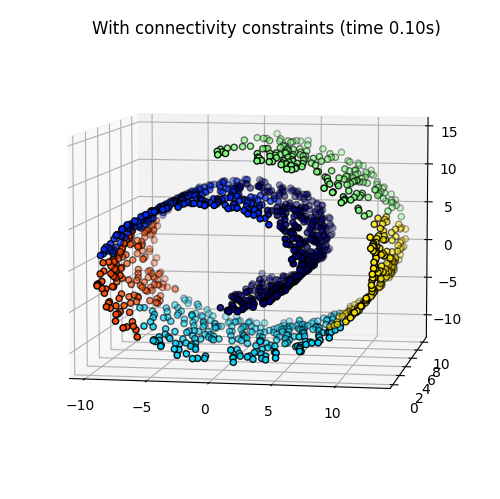

In [7]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(121, projection="3d", elev=7, azim=-80)
ax2.set_position([0, 0, 0.95, 1])
for l in np.unique(label):
    ax2.scatter(
        X[label == l, 0],
        X[label == l, 1],
        X[label == l, 2],
        color=plt.cm.jet(float(l) / np.max(label + 1)),
        s=20,
        edgecolor="k",
    )
fig2.suptitle(f"With connectivity constraints (time {elapsed_time:.2f}s)")

plt.show()